## Mortality Outcomes for Females Suffering Myocardial Infarction

![title](mifem.png)

__Myocardial Infarction__ : This is medical name of a heart attack. Heart Attack is caused by regular blockage in oxygen flow to the heart. 

Most heart attacks result from __atherosclerosis__ (Narrowing and hardening of arteries due to a buildup of plaque round artery wall). The risk factors for heart attack and atherosclerosis are basically the same:

1. An abnormally high level of blood cholesterol (hypercholesterolemia)
2. An abnormally low level of HDL (high-density lipoprotein), commonly called "good cholesterol"
3. High blood pressure (hypertension)
4. Diabetes
5. Family history of coronary artery disease at an early age
6. Cigarette smoking
7. Obesity
8. Physical inactivity (too little regular exercise)

In early middle age, men have a greater risk of heart attack than women. However, a woman's risk increases once she begins menopause. This could be the result of a menopause-related decrease in levels of estrogen, a female sex hormone that may offer some protection against atherosclerosis.

__Description__
> The data frame has 1295 rows and 10 columns. This is the female subset of the 'monica' data frame 

## Objective
We are going to study/analyse mortality outcomes for females suffering from __Myocardial Infarction__.

__Each point in the dataset have had a case of myocardinal infarction. According to sources, the common causes of MI are diabestes, old age, high cholesterol, poor diet, no exercise etc. Now, the objective of this research will be to find out whether these underlying causes actually contribute to MI or not. Also, the severity (dead or live) might depend on the underlying causes.__

Our dataset have following explanatory/independent variables:

1. age (age at onset)
2. yronset (year of onset)
3. premi (previous myocardial infarction event, a factor with levels y, n, nk not known )
4. smstat (smoking status, a factor with levels c current, x ex-smoker, n non-smoker, nk not known)
5. diabetes (a factor with levels y, n, nk not known)
6. highbp (high blood pressure, a factor with levels y, n, nk not known )
7. hichol (high cholesterol, a factor with levels y, n nk not known)
8. angina (a factor with levels y, n, nk not known) --> Type of chest pain caused due to reduced blood flow to the heart
9. stroke (a factor with levels y, n, nk not known)

And target/response (dependent) variable:

10. outcome (mortality outcome, a factor with levels live, dead)

__Source__
> Newcastle (Australia) centre of the Monica project; see the web site http://www.ktl.fi/monica 

The cause of MI depends majorly upon lifestyle (smoking, eating habits, physical activity, stress etc) and genetics (Diabetes, highbp, hormones).
And as per the sources, [https://heart.bmj.com/content/83/6/726] a high percent of death due to MI happen outside the hospital and goes unregistered. We will be analyzing the data in-hand. 


## Importing Libraries

In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [180]:
data = pd.read_csv('DataSets//mifem.csv',na_values='nk')

The 'nk' values in the data is actually case of missing values. To make the code understand that, we have passed it in 'na_values' paramter to the read_csv method. 

In [181]:
data.head(5)

,Unnamed: 0,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
0,1,live,63,85,n,x,n,y,y,n,n
1,6,live,55,85,n,c,n,y,y,n,n
2,8,live,68,85,y,NaN,NaN,y,NaN,y,n
3,10,live,64,85,n,x,n,y,n,y,n
4,11,dead,67,85,n,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

__Dropping the 'Unnamed:0' column:__ As this data is a subset taken with only females suffering with MI from the main dataset which included males, the 'Unnamed: 0' column has the sequence number of rows with female data in main datset which is not required, so dropping it. 

In [182]:
data = data.drop(labels='Unnamed: 0',axis=1)

In [183]:
data_live = len(data[data['outcome']=='live'])
data_dead = len(data[data['outcome']=='dead'])
data_live_p = (data_live/(data_dead+data_live))*100
data_dead_p = (data_dead/(data_dead+data_live))*100
print('Number of live people in our data are {}%  '.format((data_live_p)))
print('Number of dead people in our data are {}%  '.format((data_dead_p)))

Number of live people in our data are 75.2123552123552%  
Number of dead people in our data are 24.787644787644787%  


#### We have 75% of alive people data and 25% of dead people data. This might mislead the prediction due to lack of data of people who died due to Myocardial Infarction. With this dataset, every new data point (person with MI) will have high survival rate (outcome = 'live')  
__We would have to balance the outcome clases.__

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 10 columns):
outcome     1295 non-null object
age         1295 non-null int64
yronset     1295 non-null int64
premi       1239 non-null object
smstat      1192 non-null object
diabetes    1226 non-null object
highbp      1219 non-null object
hichol      1107 non-null object
angina      1196 non-null object
stroke      1216 non-null object
dtypes: int64(2), object(8)
memory usage: 101.2+ KB


We have only two number type columns rest are object/string type. 
Many columns have missing values like premi, smstat, diabetes, highbp, hichol, angina and stroke.

angina, hichol and smstat seems to be having maximum number of missing values.

In [185]:
print(data.describe())

               age      yronset
count  1295.000000  1295.000000
mean     60.922008    88.785328
std       7.042327     2.553647
min      35.000000    85.000000
25%      57.000000    87.000000
50%      63.000000    89.000000
75%      66.000000    91.000000
max      69.000000    93.000000


We can see here that average people's age in our dataset is 61 yrs and the youngest person is 35 year old and oldest is 69.

"Outcome" is our target/response variable that has to be predicted, it means whether the person will be alive or dead(response) given that existing conditions (features/explanatory variables values) in our dataset holds true. 

Other than 'Age' and 'Yronset', rest are categorical columns with values --> 'n' (no), 'y' ('yes') and 'nk' (not known or Nan values, which we will impute).

## Missing Data Imputation

In [186]:
print(data.isna().sum().sum()/len(data))
(data.isna().sum()/data.isna().count())*100

0.5173745173745173


outcome      0.000000
age          0.000000
yronset      0.000000
premi        4.324324
smstat       7.953668
diabetes     5.328185
highbp       5.868726
hichol      14.517375
angina       7.644788
stroke       6.100386
dtype: float64

#### We have 52% of total missing values out of which high cholestrol column has maximum missing values (15%) followed by smoking status (8%), angina (8%), stroke (6%), highbp (6%), diabetes (5%) and premi (4%) respectively. 

#### So the total missing percent count of the data seems to be huge but if we see column wise at max we have 15% column values missing. 
#### And further these missing column values must be repeating in rows. We can see how many rows there are with many missing column values. 

In [187]:
data[data['angina'].isna()].head()

,outcome,age,yronset,premi,smstat,diabetes,highbp,hichol,angina,stroke
4,dead,67,85,n,NaN,NaN,NaN,NaN,NaN,NaN
5,live,66,85,n,x,NaN,NaN,NaN,NaN,NaN
8,dead,46,85,n,c,n,y,NaN,NaN,n
27,dead,64,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,dead,69,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here out of 9 dependent variables, many rows have as many as 6 variables with NaN values. We will be dropping the rows with 4 or more NaN values because it does not make sense to impute so many missing values in one row as the outcome of that row will not be contributing much to our predictions. 

In [188]:
data.dropna(thresh=4,inplace=True)
data.dropna(thresh=5,inplace=True)
data.dropna(thresh=6,inplace=True)
data.dropna(thresh=7,inplace=True)

In [189]:
print((data.isna().sum().sum()/len(data))*100)
print((data.isna().sum()/data.isna().count())*100)
print('Alive peoples missing data count: ',data[data['outcome']=='live'].isnull().sum().sum())
print("Dead people's missing data count: ",data[data['outcome']=='dead'].isnull().sum().sum())
data.shape

20.992676973148903
outcome      0.000000
age          0.000000
yronset      0.000000
premi        1.220504
smstat       3.986981
diabetes     0.488202
highbp       1.301871
hichol      10.008137
angina       2.766477
stroke       1.220504
dtype: float64
Alive peoples missing data count:  144
Dead people's missing data count:  114


(1229, 10)

#### We don't have many missing values, so we will be dropping the 

In [190]:
data.dropna(axis=0,inplace=True)

Now we don't have any missing values in our dataset. Let's start to explore these variables more.

In [191]:
data.describe()

,age,yronset
count,1049.000000,1049.000000
mean,60.682555,88.702574
std,7.112596,2.507851
min,35.000000,85.000000
25%,57.000000,87.000000
50%,63.000000,89.000000
75%,66.000000,91.000000
max,69.000000,93.000000


# Visualizations

Text(0, 0.5, 'Frequency')

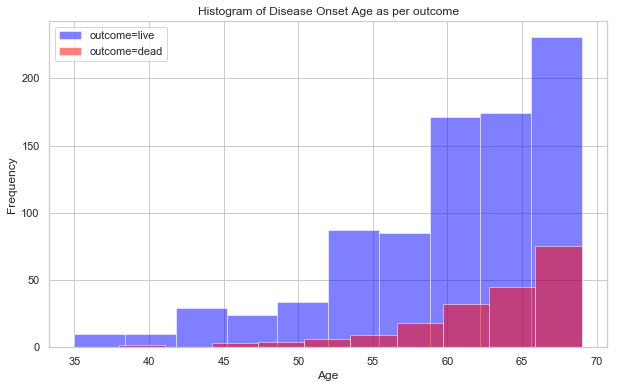

In [192]:
plt.figure(figsize=(10,6))
data[data['outcome']=='live']['age'].hist(alpha=0.5,color='blue',bins=10,label='outcome=live')
data[data['outcome']=='dead']['age'].hist(alpha=0.5,color='red',bins=10,label='outcome=dead')
plt.legend()
plt.title('Histogram of Disease Onset Age as per outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')

Majority of people's age of onset of disease in dataset lies between 52-69

__But as we have 75% of data with outcome as 'live', it is difficult to interpret much from frequencies. 
We will try to get year-wise survival rate, to see which year had maximum and minimum survival ratio.__

In [193]:
yr_data_ratio = {}
for year in data.yronset.unique():
    data_dead = data[(data['yronset']==year) & (data['outcome']=='dead')].count()[0]
    data_live = data[(data['yronset']==year) & (data['outcome']=='live')].count()[0]
    yr_data_ratio[year]=round(data_dead*100/(data_dead+data_live))
yr_data_ratio

{85: 26.0,
 86: 22.0,
 87: 17.0,
 88: 20.0,
 89: 18.0,
 90: 20.0,
 91: 17.0,
 92: 13.0,
 93: 10.0}

__Year 85, 90 and 88 had maximum dead/total outcome ratio 29%, 25% and 24% respectively. However, after 90 it had decresed continuously from 19% to 13% from year 91 to 93.__

Text(0.5, 1.0, 'Outcome for females with MI based on premi and their age')

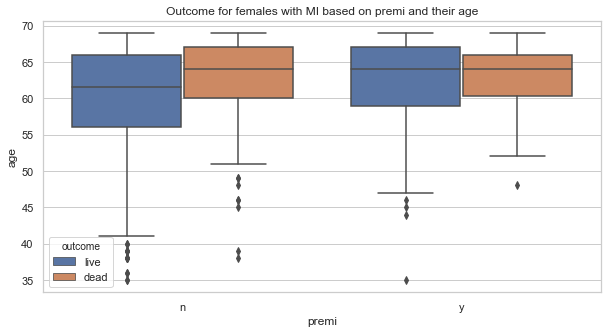

In [194]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='premi',y='age',hue='outcome',data=data,ax=ax)
ax.set_title('Outcome for females with MI based on premi and their age')

__From the above plot it looks like there are more people who didn't have premi and are dead or alive. So the above plot is not giving much clarity or information about affect of premi. Let's try to dig a litter deeper.__

In [195]:
dead_premi_n = data[(data['premi']=='n') & (data['outcome']=='dead')].shape[0]
dead_premi_y = data[(data['premi']=='y') & (data['outcome']=='dead')].shape[0]
live_premi_n = data[(data['premi']=='n') & (data['outcome']=='live')].shape[0]
live_premi_y = data[(data['premi']=='y') & (data['outcome']=='live')].shape[0]
print('People who had MI previously and are dead : ',dead_premi_y)
print('People who had MI previously and are alive : ',live_premi_y)
print('People who didnt have MI previously and are dead : ',dead_premi_n)
print('People who didnt have MI previously and are alive : ',live_premi_n)

People who had MI previously and are dead :  62
People who had MI previously and are alive :  193
People who didnt have MI previously and are dead :  132
People who didnt have MI previously and are alive :  662


In [196]:
print('Ratio of people who didnt have MI but are dead: ',round(dead_premi_n*100/(dead_premi_n+live_premi_n)),'%')
print('Ratio of people who had MI and are dead: ',round(dead_premi_y*100/(dead_premi_y+live_premi_y)),'%')

Ratio of people who didnt have MI but are dead:  17 %
Ratio of people who had MI and are dead:  24 %


__The survival rate of people who didn't have previuos MI event is 80% compared to people who had MI in past 74% .__
In the above boxplot, we can also see many outliers. Here outliers are the young people with/without premi. 
We can check how many such data points we have.

In [197]:
data_after_outlier=data[~(data['age']<=40)]

There are lesser females with outcome 'dead' who had previous history of premi than those who didn't. 
One reason could be that after the MI event they became more aware and took proper care of themselves than those who didn't have any earlier MI instance. The age for both the cases (dead with premi 'n' and 'y') lie in almost same range 60-68.

Text(0.5, 1.0, 'Year wise frequency of disease onset')

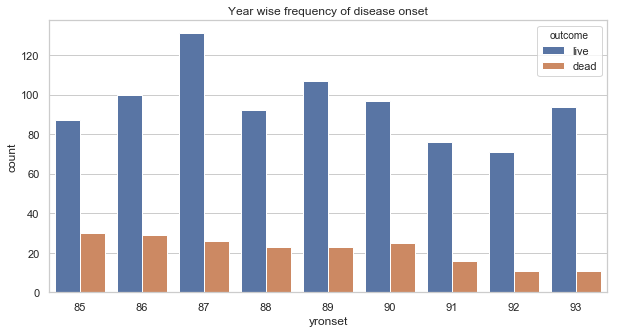

In [198]:
fig,ax = plt.subplots(figsize=(10,5))
sns.countplot(data.yronset,hue= data.outcome)
plt.title('Year wise frequency of disease onset')


#### Here, we can see that deaths of people have declined after year '90 (Dead<30) compared to year '85 (60>Dead>50) 

Text(0, 0.5, 'Proportion of people alive')

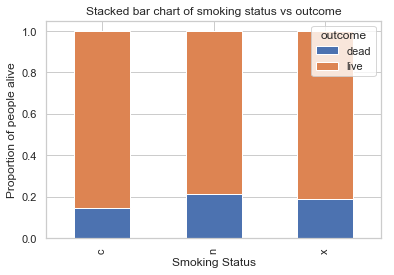

In [199]:
table = pd.crosstab(data.smstat,data.outcome)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked bar chart of smoking status vs outcome')
plt.xlabel('Smoking Status')
plt.ylabel('Proportion of people alive')

Text(0.5, 1.0, 'Outcome for females with MI based on smstat (smoking) and their age')

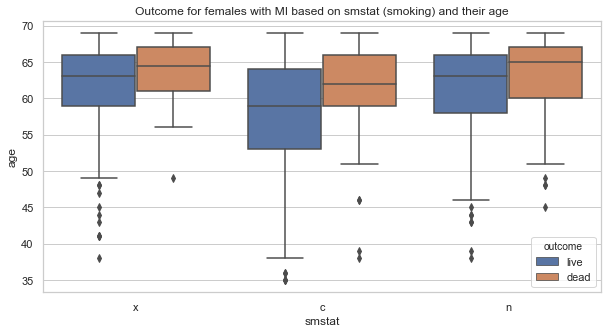

In [200]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='smstat',y='age',hue='outcome',data=data,ax=ax)
ax.set_title('Outcome for females with MI based on smstat (smoking) and their age')

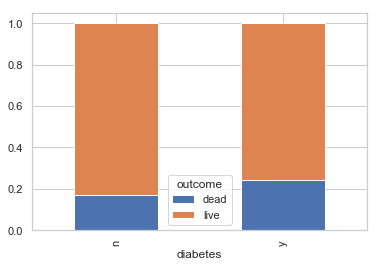

In [201]:
table = pd.crosstab(data.diabetes,data.outcome)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

Text(0.5, 1.0, 'Outcome based on diabetes and age')

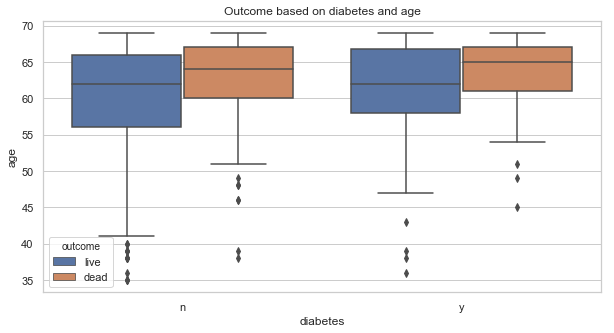

In [202]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='diabetes',y='age',hue='outcome',data=data)
plt.title('Outcome based on diabetes and age')

__In this case, the 'dead' class distribution looks same for people with and without diabetes. For class 'live', women with diabetes are slightly in upper range than women without diabetes__

Text(0, 0.5, 'Frequency')

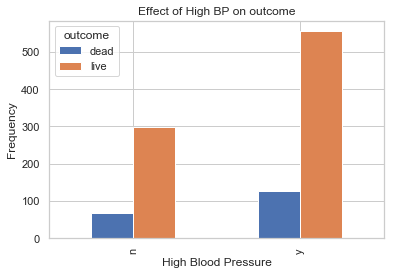

In [203]:
pd.crosstab(data.highbp,data.outcome).plot(kind='bar')
plt.title('Effect of High BP on outcome')
plt.xlabel('High Blood Pressure')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Outcome based on highbp and age')

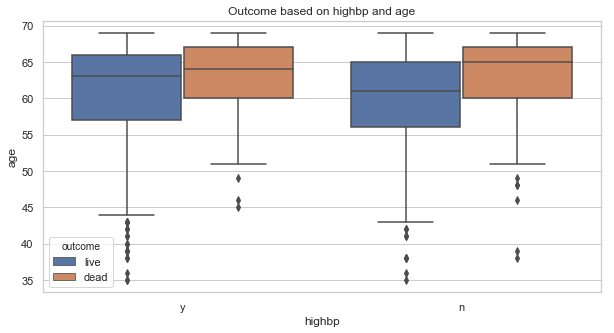

In [204]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='highbp',y='age',hue='outcome',data=data)
plt.title('Outcome based on highbp and age')

Text(0.5, 1.0, 'High Cholestrol Frequency')

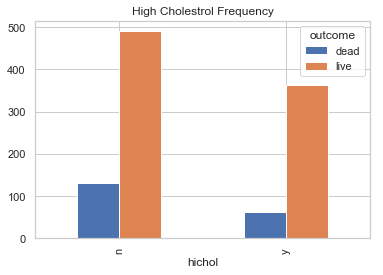

In [205]:
pd.crosstab(data.hichol,data.outcome).plot(kind='bar')
plt.title('High Cholestrol Frequency')

Text(0.5, 1.0, 'Outcome based on hichol and age')

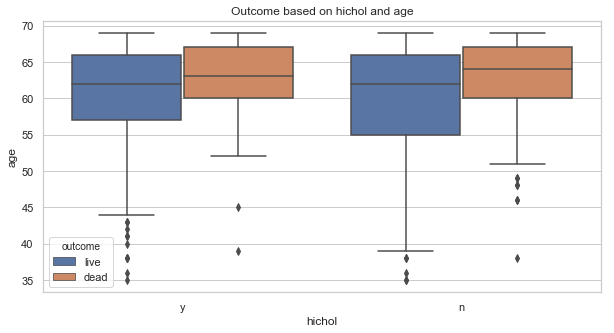

In [206]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='hichol',y='age',hue='outcome',data=data)
plt.title('Outcome based on hichol and age')

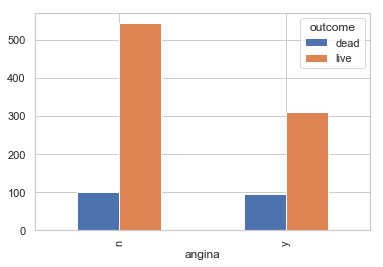

In [207]:
pd.crosstab(data.angina,data.outcome).plot(kind='bar')

Text(0.5, 1.0, 'Outcome based on angina and age')

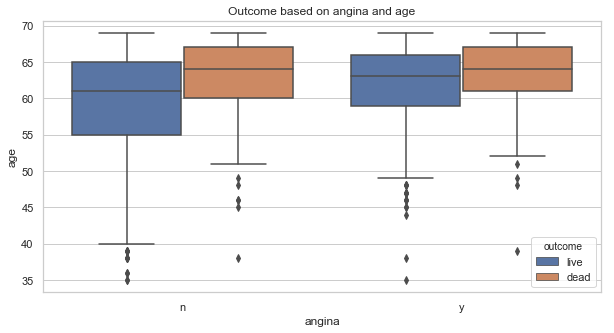

In [208]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='angina',y='age',hue='outcome',data=data)
plt.title('Outcome based on angina and age')

__Angina is an early symptom and a sign that you can be at a risk of heart attack or stroke. The people with angina tend to have angina even after myocardial infarction. And people with myocardial infarction tend to develop angina later.__
__So in our dataset we can see that there are only 64 cases where the patients have MI but not angina and 405 cases where patients have angina with (191) or without (214) MI. In 580 cases females in our dataset neither have MI nor angina.__

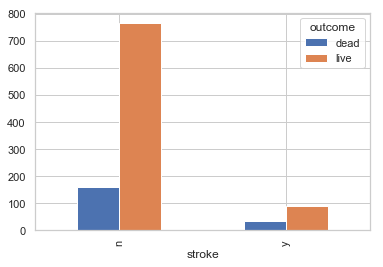

In [209]:
pd.crosstab(data.stroke,data.outcome).plot(kind='bar')

Text(0.5, 1.0, 'Outcome based on prevoius stroke history and age')

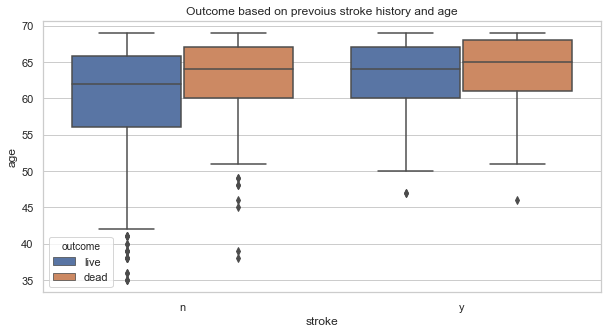

In [210]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='stroke',y='age',hue='outcome',data=data)
plt.title('Outcome based on prevoius stroke history and age')

__From the above boxplots, it can be seen that 50% of female's age with 'dead' outcome lie in the range 59-69. And maximum women who are dead are above 50 year of age.__

__Also the 'dead' count of women had decreased for year of onset 90 or more, it can be because medical science has made new discoveries and research developments.__ 
__Initial treatments for MI like percutaneous coronary intervention (PCI), or coronary artery bypass graft (CABG) surgery have made significant progress in the management of obstructive CAD over the past three decades.__
__It was introduced in late 70's but it came into practice by major medical institutions around mid-80's and since then enhancements/improvements/medical researchers have been constantly made to the procedure.__

__And from the above Year wise frequency of MI onset plot also we can see improvement in survival rate after 90's. In the above boxplots, we can see that young people are considered as outliers and which is quite obvious because most of the time heart problems happens over time due to unhealthy lifestyle or genes. And also young people tend to ignore the symptoms like chest pain or problem in breathing that might happen at irregular intervals and get severe with age and then get diagnosed.__

__Above boxplots helped to get a slight idea about the effect of risk factors for MI, that we have considered in our dataset (explanatory variables), on the survival rate (outcome variable).__

__However, we had unbalanced classes due to which we can see in our plots very slight effect of these problems on the mortality rate. For e.g. frequency and age group of people who are dead with/without high cholesterol is almost same.__
__We will now convert categorical variables into numeric and balance the classes, then see the proportion for mortality rate for different variables individually and in pairs to get more clarity.__


#### Plotting heatmap for categorical variables

In [211]:
import scipy.stats as ss
def cramers_v(x, y):
    '''
    function to return correlation value between two categorical variables
    '''
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

def logistic_correlation(dataframe):
    '''
    function to return pandas dataframe with correlation value between categorical variables.
    '''
    size = len(dataframe.columns.tolist())
    matrix = np.empty((size,size))
    for i, variable_x in enumerate(dataframe.columns.tolist()):
        x = dataframe[variable_x]
        result = 0
        for j, variable_y in enumerate(dataframe.columns.tolist()):
            y = dataframe[variable_y]
            if i > j :
                
                continue              
                
            elif i == j :
                
                result = 1
                
            else:
                
                result = cramers_v(x, y)
                
            matrix[i,j] = result
            matrix[j,i] = result
            
    result    = pd.DataFrame(index=dataframe.columns.tolist(),columns=dataframe.columns.tolist(),data=matrix)
    
    return  result

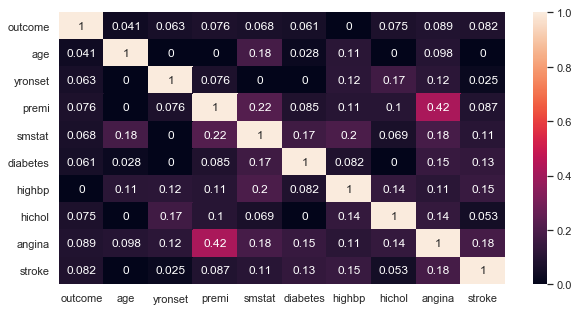

In [212]:
plt.subplots(figsize=(10,5))
sns.heatmap(logistic_correlation(data),annot=True)

## Creating Dummy variables

In [213]:
cat_vars = ['premi','smstat','diabetes','highbp','hichol','angina','stroke','outcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data = data1

In [214]:
cols = data.columns.values.tolist()

In [215]:
to_keep = [i for i in cols if i not in cat_vars]
data_final = data[to_keep]

In [216]:
data_final.head()

,age,yronset,premi_n,premi_y,smstat_c,smstat_n,smstat_x,diabetes_n,diabetes_y,highbp_n,highbp_y,hichol_n,hichol_y,angina_n,angina_y,stroke_n,stroke_y,outcome_dead,outcome_live
0,63,85,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1
1,55,85,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1
3,64,85,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
6,63,85,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1
7,68,85,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0


__Dropping the unnecessary columns, as from one column 0 or 1 value we can determine both 'y' and 'n' data.__

In [217]:
data_final.drop(['angina_n','premi_n','highbp_n','smstat_n','hichol_n','stroke_n','diabetes_n','outcome_dead'],axis=1,inplace=True)

F:\Softwares\Anaconda\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


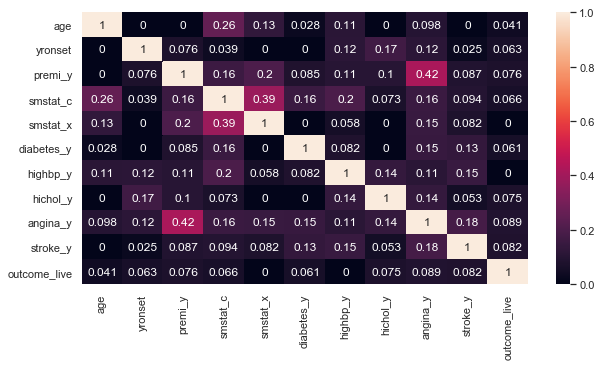

In [218]:
plt.subplots(figsize=(10,5))
sns.heatmap(logistic_correlation(data_final),annot=True)

From the correlation values above, we can see that angina and premi are positively correlated and has highest value from all the variables. 

__After changing categorical variables into numeric, we will analyse the mortality and survival rate.__

From the above heat-map, we can see some correlation between Pre-MI and Angina, so will try to find if that is true by checking their combined ratios.

In [221]:
num_ = data_final[(data_final['outcome_live']==1) & (data_final['premi_y']==1) & (data_final['angina_y']==1)].shape[0]
        
den_ = data_final[data_final['outcome_live']==1].shape[0]

print(np.divide(num_,den_))

num_ = data_final[(data_final['outcome_live']==1) & (data_final['premi_y']==0) & (data_final['angina_y']==0)].shape[0]
        
den_ = data_final[data_final['outcome_live']==1].shape[0]

print(np.divide(num_,den_))

num_ = data_final[(data_final['outcome_live']==1) & (data_final['premi_y']==1) & (data_final['angina_y']==0)].shape[0]
        
den_ = data_final[data_final['outcome_live']==1].shape[0]

print(np.divide(num_,den_))

num_ = data_final[(data_final['outcome_live']==1) & (data_final['premi_y']==0) & (data_final['angina_y']==1)].shape[0]
        
den_ = data_final[data_final['outcome_live']==1].shape[0]

print(np.divide(num_,den_))

0.17076023391812867
0.5812865497076023
0.05497076023391813
0.19298245614035087


From the analysis mortality rate of people with only pre-MI condition (no symptom of angina) is 0.09 but women with angina and no pre-MI have mortality rate of 0.25 and women with both pre-mi and angina have 0.23. Still women suffering from neither has 0.43 mortality rate which is less than the survival rate 0.58.

This is also in sync with the other researches that states that people with angina may or may not develop MI at a later stage. But if they do get MI, then the chances of angina getting severe increases and if people have MI first, then there are high chances that they will develop angina later. Angina is also one of the initial symptoms for MI.

In [223]:
cols = ['premi_y','highbp_y','hichol_y','angina_y','diabetes_y','stroke_y','smstat_c','smstat_x']

def data_class_ratio(class_value,col1,col_val1):
    '''
    Function to return ratios like 
    (dead people with highbp)/(total dead people) or 
    (live people with highBP)/(total live people) or
    (dead people with highBP and diabetes)/(total dead people)
    '''
    num_ = data_final[(data_final['outcome_live']==class_value) & (data_final[col1]==col_val1)].shape[0]
        
    den_ = data_final[data_final['outcome_live']==class_value].shape[0]
    
    out = np.round(np.divide(num_,den_),2)
    
    if (class_value ==0 and col_val1==0):
        print('Mortality rate without ',col1,' : ', out)
    if (class_value ==0 and col_val1==1):
        print('Mortality rate with ',col1,' : ', out)
    if (class_value ==1 and col_val1==0):
        print('Survival rate without ',col1,' : ', out)
    if (class_value ==1 and col_val1==1):
        print('Survival rate with ',col1,' : ', out)

In [224]:
# Fetch survival and mortality rate for people with the symptoms
for i in cols:
    data_class_ratio(0,i,1)
    data_class_ratio(1,i,1)
#data_final[(data_final['outcome_live']==1) & ((data_final['smstat_c']==0) & (data_final['smstat_x']==0))].shape[0]/data_final[data_final['outcome_live']==1].shape[0]

Mortality rate with  premi_y  :  0.32
Survival rate with  premi_y  :  0.23
Mortality rate with  highbp_y  :  0.65
Survival rate with  highbp_y  :  0.65
Mortality rate with  hichol_y  :  0.32
Survival rate with  hichol_y  :  0.43
Mortality rate with  angina_y  :  0.48
Survival rate with  angina_y  :  0.36
Mortality rate with  diabetes_y  :  0.25
Survival rate with  diabetes_y  :  0.18
Mortality rate with  stroke_y  :  0.18
Survival rate with  stroke_y  :  0.1
Mortality rate with  smstat_c  :  0.26
Survival rate with  smstat_c  :  0.35
Mortality rate with  smstat_x  :  0.24
Survival rate with  smstat_x  :  0.23


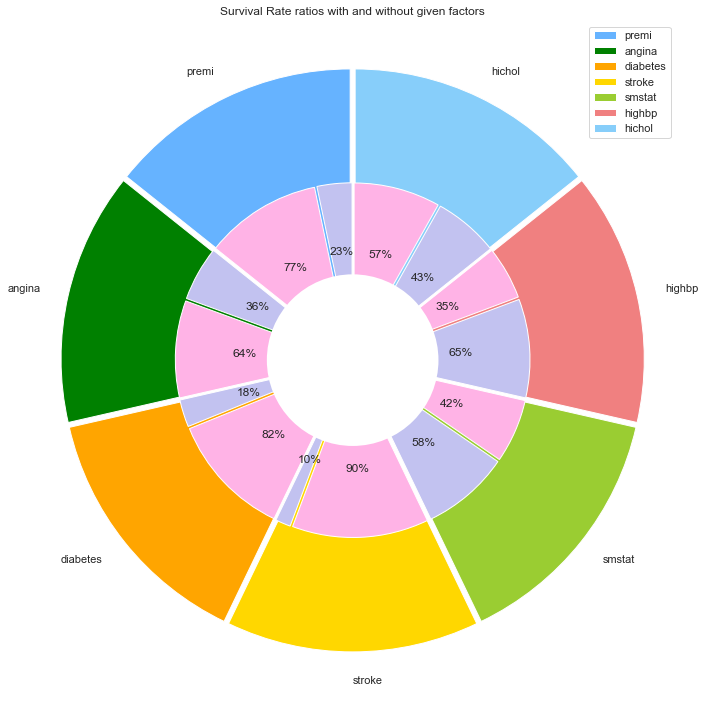

In [225]:
# Survival Rate pie-chart
plt.figure(figsize=(10,10))
labels = 'premi', 'angina', 'diabetes', 'stroke','smstat', 'highbp','hichol'
sizes = [1,1,1,1,1,1,1]
explode = (0.1,0.1, 0.1,0.1,0.1, 0.1,0.1)  # explode 1st slice

labels_outcome = ['w_premi','wo_premi', 'w_angina', 'wo_angina', 'w_diabetes','wo_diabetes', 
                  'w_stroke','wo_stroke','w_smstat','wo_smstat', 'w_highbp','wo_highbp','w_hichol','wo_hichol']
sizes_outcome = [0.23,0.77,0.36,0.64,0.18,0.82,0.1,0.9,0.58,0.42,0.65,0.35,0.43,0.57]
colors = ['#66b3ff','green','orange','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
colors_outcome = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode_outcome = (0.1,0.1, 0.1,0.1,0.1, 0.1,0.1 ,0.1,0.1, 0.1,0.1,0.1, 0.1,0.1)
#Plot
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{v:d}%'.format(p=pct,v=val)
    return my_autopct

plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_outcome,colors=colors_outcome,startangle=90, explode=explode_outcome,radius=3,autopct=make_autopct(sizes_outcome*100))
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.legend()
plt.title('Survival Rate ratios with and without given factors')
plt.show()

In [226]:
for i in cols:
    data_class_ratio(0,i,1)
    data_class_ratio(0,i,0)

Mortality rate with  premi_y  :  0.32
Mortality rate without  premi_y  :  0.68
Mortality rate with  highbp_y  :  0.65
Mortality rate without  highbp_y  :  0.35
Mortality rate with  hichol_y  :  0.32
Mortality rate without  hichol_y  :  0.68
Mortality rate with  angina_y  :  0.48
Mortality rate without  angina_y  :  0.52
Mortality rate with  diabetes_y  :  0.25
Mortality rate without  diabetes_y  :  0.75
Mortality rate with  stroke_y  :  0.18
Mortality rate without  stroke_y  :  0.82
Mortality rate with  smstat_c  :  0.26
Mortality rate without  smstat_c  :  0.74
Mortality rate with  smstat_x  :  0.24
Mortality rate without  smstat_x  :  0.76


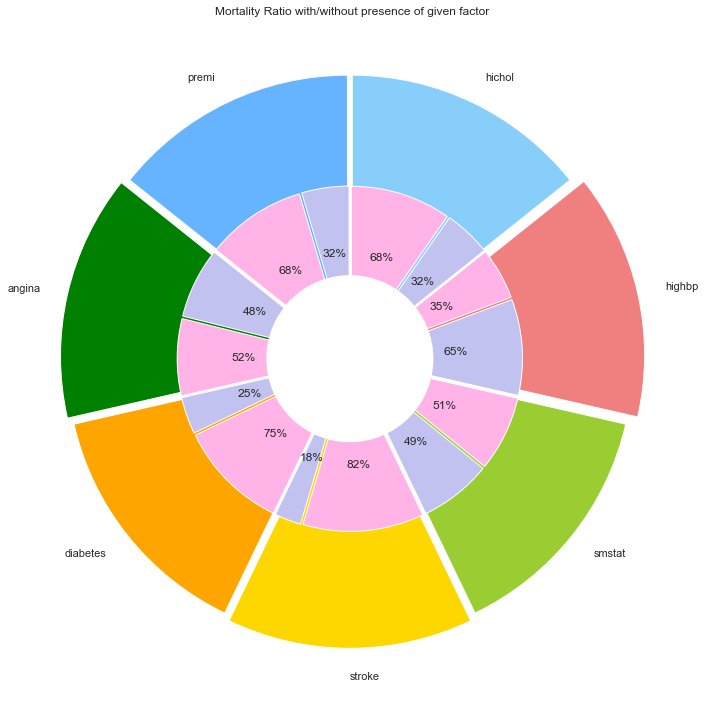

In [227]:
plt.figure(figsize=(10,10))
labels = 'premi', 'angina', 'diabetes', 'stroke','smstat', 'highbp','hichol'
sizes = [1,1,1,1,1,1,1]
explode = (0.1,0.2, 0.1,0.2,0.1, 0.3,0.1)  # explode 1st slice

labels_outcome = ['w_premi','wo_premi', 'w_angina', 'wo_angina', 'w_diabetes','wo_diabetes', 
                  'w_stroke','wo_stroke','w_smstat','wo_smstat', 'w_highbp','wo_highbp','w_hichol','wo_hichol']
sizes_outcome = [0.32,0.68,0.48,0.52,0.25,0.75,0.18,0.82,0.49,0.51,0.65,0.35,0.32,0.68]
colors = ['#66b3ff','green','orange','gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
colors_outcome = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode_outcome = (0.1,0.1, 0.1,0.1,0.1, 0.1,0.1 ,0.1,0.1, 0.1,0.1,0.1, 0.1,0.1)
#Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True, explode=explode,radius=5)
plt.pie(sizes_outcome,colors=colors_outcome,startangle=90, explode=explode_outcome,radius=3,autopct=make_autopct(sizes_outcome*100))
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.title('Mortality Ratio with/without presence of given factor')
plt.show()

# Oversampling using SMOTE 

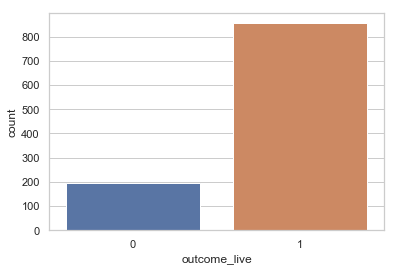

In [228]:
X = data_final.loc[:,data_final.columns != 'outcome_live']
Y = data_final.loc[:,data_final.columns == 'outcome_live']
sns.countplot(data_final.outcome_live)

#### This imbalance of data could affect the correlation between variables and affect the resut. We can balance the data through undersampling or oversampling. 
#### Undersampling is reducing the larger class (OUTCOME ='live') and bring it equal to smaller class ( OUTCOME = 'dead'). Oversampling is randomly generating samples of minority class("dead" here) and bring it equal to majority class ("live" in our dataset). This can be achieved through SMOTE ((Synthetic Minority Over-sampling Technique)).

We will be using oversampling here.

In [229]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
os = SMOTE(random_state=0)
X_train,X_TEST,Y_train,Y_TEST = train_test_split(X,Y,test_size=0.2,random_state=0)
columns=X_train.columns

In [230]:
os_data_X,os_data_Y = os.fit_sample(X_train,Y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns)
os_data_Y = pd.DataFrame(data=os_data_Y,columns=['outcome_live'])

F:\Softwares\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [231]:
print('Length of oversampled data is ',len(os_data_X))
print('length of people who died due to disease are ',len(os_data_Y[os_data_Y['outcome_live']==0]))
print('length of people who are alive with disease are ',len(os_data_Y[os_data_Y['outcome_live']==1]))

Length of oversampled data is  1374
length of people who died due to disease are  687
length of people who are alive with disease are  687


Now we have a perfect balanced data! I over-sampled only on the training data, because by oversampling only on the training data, none of the information in the test data is being used to create synthetic observations, therefore, no information will bleed from test data into the model training.

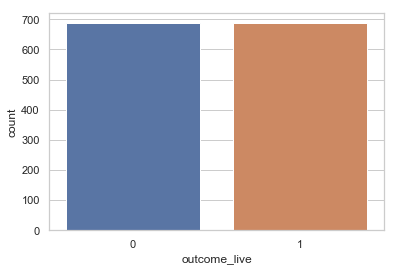

In [232]:
sns.countplot(os_data_Y.outcome_live)

In [233]:
cols = list(data_final.columns)
df = pd.DataFrame(data=os_data_X,columns=cols)
df = df.loc[:,df.columns != 'outcome_live']
df.head()

,age,yronset,premi_y,smstat_c,smstat_x,diabetes_y,highbp_y,hichol_y,angina_y,stroke_y
0,60,88,0,1,0,0,0,0,0,0
1,63,88,0,1,0,0,0,0,0,0
2,62,88,0,1,0,0,0,0,0,0
3,65,86,0,1,0,0,0,0,0,0
4,62,91,0,1,0,0,0,0,0,0


# Recursive Feature Elimination (RFE) and Logistic Regression

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhausted. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [234]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

In [235]:
rfe = RFE(logreg,7)
rfe = rfe.fit(os_data_X,os_data_Y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)
os_data_X.columns

[False False  True  True  True  True  True  True False  True]
[2 4 1 1 1 1 1 1 3 1]


F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Index(['age', 'yronset', 'premi_y', 'smstat_c', 'smstat_x', 'diabetes_y',
       'highbp_y', 'hichol_y', 'angina_y', 'stroke_y'],
      dtype='object')

We will be removing 'yronset' from our column list.

In [254]:
cols = ['age','premi_y', 'smstat_c', 'smstat_x',  'diabetes_y', 'highbp_y', 'hichol_y',  'angina_y',  'stroke_y']
X = os_data_X[cols]
Y = os_data_Y['outcome_live'].iloc[:]

In [266]:
X_TEST.drop(axis=1,columns=['yronset'],inplace=True)

,age,premi_y,smstat_c,smstat_x,diabetes_y,highbp_y,hichol_y,angina_y,stroke_y
888,47,0,1,0,0,0,0,1,0
779,59,0,0,0,0,1,1,0,0
839,55,1,0,1,0,1,1,1,0
881,61,0,1,0,0,0,0,0,0
589,66,1,0,0,0,1,0,1,0
36,62,1,0,1,0,1,1,1,1
40,67,1,0,0,1,1,0,1,0
656,69,0,0,0,0,0,0,0,1
808,36,0,1,0,1,1,0,0,0
588,67,1,1,0,0,0,1,0,0


In [267]:
logreg.fit(X,Y)
Y_predict_train = logreg.predict(X)
Y_predict_test = logreg.predict(X_TEST)

F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Using Decision Tree Classifier

In [274]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
Y_dt_predict = dtree.predict(X_TEST)
Y_dtr_predict = dtree.predict(X)

### Using Random Forest

In [275]:
from sklearn.ensemble import RandomForestClassifier
rtree = RandomForestClassifier()
rtree.fit(X_train,Y_train)
Y_rt_predict = rtree.predict(X_TEST)
Y_rtr_predict = rtree.predict(X)

F:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [270]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
scores = []
scores1 = []
scores2 = []
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    #print("Train Index: ", train_index, "\n")
    #print("Test Index: ", test_index)
    X_train1, X_test1, Y_train1, Y_test1 = X.iloc[train_index], X.iloc[test_index], Y.iloc[train_index], Y.iloc[test_index]
    logreg = LogisticRegression()
    logreg.fit(X_train1,Y_train1)
    scores.append(logreg.score(X_test1, Y_test1))
    dtree = DecisionTreeClassifier()
    dtree.fit(X_train1,Y_train1)
    scores1.append(dtree.score(X_test1, Y_test1))
    rtree = RandomForestClassifier()
    rtree.fit(X_train1,Y_train1)
    scores2.append(rtree.score(X_test1, Y_test1))

F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\Softwares\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\Softwares\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

In [271]:
print(np.round(np.mean(scores),2))
print(np.round(np.mean(scores1),2))
print(np.round(np.mean(scores2),2))

0.66
0.72
0.73


# Model Evaluation

#### Accuracy Score:

In [276]:
from sklearn.metrics import accuracy_score
print('Accuracy score of test data using logistic is ',np.round(accuracy_score(Y_TEST,Y_predict_test),2))
print('Accuracy score of train data using logistic is ',np.round(accuracy_score(Y,Y_predict_train),2))
print('Accuracy score of test data using Decision Tree is ',np.round(accuracy_score(Y_TEST,Y_dt_predict),2))
print('Accuracy score of train data using Decision Tree is ',np.round(accuracy_score(Y,Y_dtr_predict),2))
print('Accuracy score of test data using Random Forest is ',np.round(accuracy_score(Y_TEST,Y_rt_predict),2))
print('Accuracy score of train data using Random Forest is ',np.round(accuracy_score(Y,Y_rtr_predict),2))

Accuracy score of test data using logistic is  0.67
Accuracy score of train data using logistic is  0.7
Accuracy score of test data using Decision Tree is  0.64
Accuracy score of train data using Decision Tree is  0.85
Accuracy score of test data using Random Forest is  0.61
Accuracy score of train data using Random Forest is  0.85



#### Confusion Matrix: 

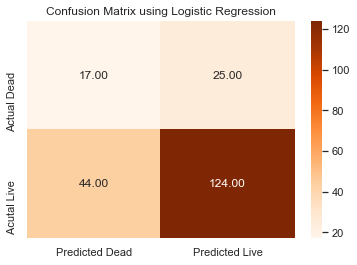

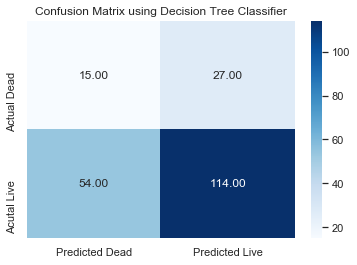

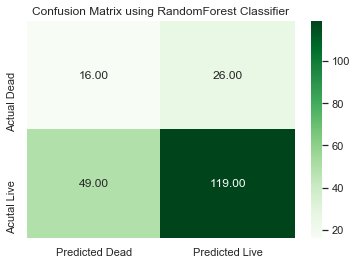

In [277]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = pd.DataFrame(confusion_matrix(Y_TEST, Y_rt_predict))
confusion_matrix2 = pd.DataFrame(confusion_matrix(Y_TEST, Y_dt_predict))
confusion_matrix = pd.DataFrame(confusion_matrix(Y_TEST, Y_predict_test))
confusion_matrix.index = ['Actual Dead',' Acutal Live']
confusion_matrix.columns = ['Predicted Dead','Predicted Live']
confusion_matrix1.index = ['Actual Dead','Acutal Live']
confusion_matrix1.columns = ['Predicted Dead','Predicted Live']
confusion_matrix2.index = ['Actual Dead','Acutal Live']
confusion_matrix2.columns = ['Predicted Dead','Predicted Live']
plt.title('Confusion Matrix using Logistic Regression')
sns.heatmap(confusion_matrix,annot=True,cmap='Oranges',fmt='.2f')
plt.figure()
plt.title('Confusion Matrix using Decision Tree Classifier')
sns.heatmap(confusion_matrix1,annot=True,cmap='Blues',fmt='.2f')
plt.figure()
plt.title('Confusion Matrix using RandomForest Classifier')
sns.heatmap(confusion_matrix2,annot=True,cmap='Greens',fmt='.2f')

__Precision:__ It is the ‘Exactness’, ability of the model to return only relevant instances. If your use case/problem statement involves minimizing the False Positives, i.e. in current scenario if you don’t want the dead people to be labelled as 'Live' by the Model then Precision is something you need.

__Recall:__ It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity. In the current scenario if your focus is to have the least False Negatives i.e. you don’t alive people to be wrongly classified as 'Dead' then Recall can come to your rescue.

__F-measure:__
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.
The F-Measure will always be nearer to the smaller value of Precision or Recall.

$Precision = TP/(TP+FP)$

$Recall = TP/(TP+FN)$

$F1 = 2*(Precision_/*Recall)/(Precision+Recall)$

In [175]:
from sklearn.metrics import f1_score
print('Logistic regression F1-score: ',f1_score(Y_TEST,Y_predict_test))
print('Decision Tree F1-score: ',f1_score(Y_TEST,Y_dt_predict))
print('Random Forest F1-score: ',f1_score(Y_TEST,Y_rt_predict))

Logistic regression F1-score:  0.7096774193548386
Decision Tree F1-score:  0.7102040816326531
Random Forest F1-score:  0.6987951807228916


__High recall, low precision:__ This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.

__Low recall, high precision:__ This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)

In [176]:
from sklearn.metrics import classification_report 
print(classification_report(Y_TEST,Y_predict_test))
print(classification_report(Y_TEST,Y_dt_predict))
print(classification_report(Y_TEST,Y_rt_predict))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       140
           1       0.69      0.73      0.71       135

    accuracy                           0.71       275
   macro avg       0.71      0.71      0.71       275
weighted avg       0.71      0.71      0.71       275

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       140
           1       0.79      0.64      0.71       135

    accuracy                           0.74       275
   macro avg       0.75      0.74      0.74       275
weighted avg       0.75      0.74      0.74       275

              precision    recall  f1-score   support

           0       0.70      0.81      0.75       140
           1       0.76      0.64      0.70       135

    accuracy                           0.73       275
   macro avg       0.73      0.73      0.72       275
weighted avg       0.73      0.73      0.73       275



#### Random Forest has the highest accuracy , precision, recall and F1-Score

## AUC/ROC Curve

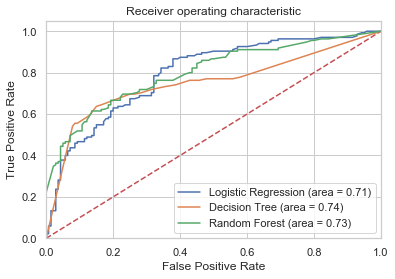

In [178]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_TEST, Y_predict_test)
logit_roc_auc1 = roc_auc_score(Y_TEST, Y_dt_predict)
logit_roc_auc2 = roc_auc_score(Y_TEST, Y_rt_predict)
fpr, tpr, thresholds = roc_curve(Y_TEST, logreg.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#Decision Tree curve
fpr, tpr, thresholds = roc_curve(Y_TEST, dtree.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc1)
plt.legend(loc="lower right")
#Random Forest Curve
fpr, tpr, thresholds = roc_curve(Y_TEST, rtree.predict_proba(X_TEST)[:,1])
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % logit_roc_auc2)
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

__ROC is plot of True positive Rate (Recall) vs False Positive Rate. The farther the blue line is above the red line the better is our prediction__
The more area we have under ROC curve, the better the fit. 